In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.metrics import MAE,MAPE,mean_squared_error,mean_absolute_percentage_error
from keras.losses import MAE,MAPE,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import time

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
x = np.loadtxt("maxwell.txt")
df = pd.DataFrame(x,columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24","F25","Effort"])

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:25])
        train_y.append(i[25])
    for i in test_d:
        test_x.append(i[:25])
        test_y.append(i[25])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [6]:
foldsIndex = k10Fold(24,scaled_data)

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19], [20, 21], [22, 23], [24, 25], [26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]]


In [7]:
model = Sequential()
model.add(Dense((128), activation="tanh", input_shape=(25,)))
model.add(Dense((64), activation="tanh"))
model.add(Dense((32), activation="tanh"))
model.add(Dense((1), activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae","mape"])

training using 24 folds: each model has 200 epochs
 
Fold  # 1


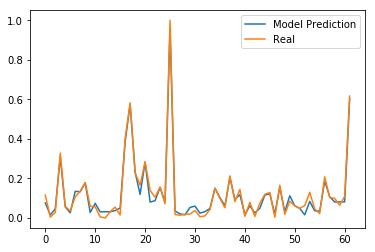

predicted =  [0.07593517]        real =  0.11547907654766998       
predicted =  [0.01543045]        real =  0.004151415759534788       
predicted =  [0.04537358]        real =  0.027681386763004866       
predicted =  [0.30777347]        real =  0.32781923911837874       
predicted =  [0.05557298]        real =  0.057692002978878484       
predicted =  [0.02592804]        real =  0.03554055552914706       
predicted =  [0.13456236]        real =  0.10674842737399186       
predicted =  [0.13230877]        real =  0.13534882983948918       
predicted =  [0.17697977]        real =  0.1793189776742565       
predicted =  [0.02716036]        real =  0.05889623045110995       
predicted =  [0.07376039]        real =  0.056519465703284685       
predicted =  [0.03050135]        real =  0.005022896167070717       
predicted =  [0.03130931]        real =  0.0       
predicted =  [0.03110776]        real =  0.03140498486793111       
predicted =  [0.03682764]        real =  0.05488742057644467

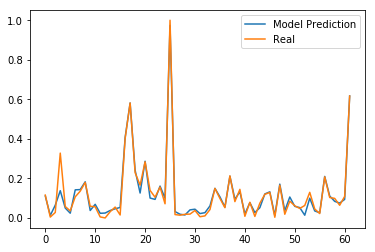

predicted =  [0.1107877]        real =  0.11547907654766998       
predicted =  [0.01264788]        real =  0.004151415759534788       
predicted =  [0.0645389]        real =  0.027681386763004866       
predicted =  [0.13779548]        real =  0.32781923911837874       
predicted =  [0.04999654]        real =  0.057692002978878484       
predicted =  [0.02384528]        real =  0.03554055552914706       
predicted =  [0.14199424]        real =  0.10674842737399186       
predicted =  [0.14339803]        real =  0.13534882983948918       
predicted =  [0.18270127]        real =  0.1793189776742565       
predicted =  [0.03756744]        real =  0.05889623045110995       
predicted =  [0.06888796]        real =  0.056519465703284685       
predicted =  [0.02328368]        real =  0.005022896167070717       
predicted =  [0.02469342]        real =  0.0       
predicted =  [0.03752146]        real =  0.03140498486793111       
predicted =  [0.04618604]        real =  0.054887420576444676 

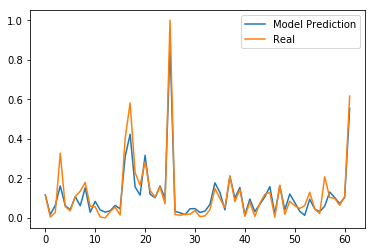

predicted =  [0.11664173]        real =  0.11547907654766998       
predicted =  [0.0170531]        real =  0.004151415759534788       
predicted =  [0.06334801]        real =  0.027681386763004866       
predicted =  [0.16180022]        real =  0.32781923911837874       
predicted =  [0.06160893]        real =  0.057692002978878484       
predicted =  [0.041745]        real =  0.03554055552914706       
predicted =  [0.10754552]        real =  0.10674842737399186       
predicted =  [0.061384]        real =  0.13534882983948918       
predicted =  [0.15188]        real =  0.1793189776742565       
predicted =  [0.02846772]        real =  0.05889623045110995       
predicted =  [0.08375438]        real =  0.056519465703284685       
predicted =  [0.04050551]        real =  0.005022896167070717       
predicted =  [0.02944662]        real =  0.0       
predicted =  [0.03570816]        real =  0.03140498486793111       
predicted =  [0.0631278]        real =  0.054887420576444676       


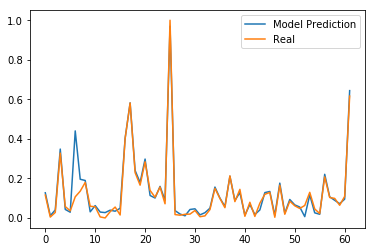

predicted =  [0.1270636]        real =  0.11547907654766998       
predicted =  [0.01112843]        real =  0.004151415759534788       
predicted =  [0.04050835]        real =  0.027681386763004866       
predicted =  [0.34826905]        real =  0.32781923911837874       
predicted =  [0.04289266]        real =  0.057692002978878484       
predicted =  [0.0289298]        real =  0.03554055552914706       
predicted =  [0.4401896]        real =  0.10674842737399186       
predicted =  [0.19557218]        real =  0.13534882983948918       
predicted =  [0.18940726]        real =  0.1793189776742565       
predicted =  [0.03085834]        real =  0.05889623045110995       
predicted =  [0.0623292]        real =  0.056519465703284685       
predicted =  [0.02960899]        real =  0.005022896167070717       
predicted =  [0.02693594]        real =  0.0       
predicted =  [0.03915434]        real =  0.03140498486793111       
predicted =  [0.03388488]        real =  0.054887420576444676   

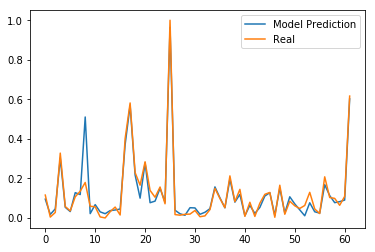

predicted =  [0.09497208]        real =  0.11547907654766998       
predicted =  [0.01755178]        real =  0.004151415759534788       
predicted =  [0.04578127]        real =  0.027681386763004866       
predicted =  [0.30275738]        real =  0.32781923911837874       
predicted =  [0.05380611]        real =  0.057692002978878484       
predicted =  [0.03210121]        real =  0.03554055552914706       
predicted =  [0.12766686]        real =  0.10674842737399186       
predicted =  [0.11821888]        real =  0.13534882983948918       
predicted =  [0.5105227]        real =  0.1793189776742565       
predicted =  [0.02176439]        real =  0.05889623045110995       
predicted =  [0.06720918]        real =  0.056519465703284685       
predicted =  [0.03062697]        real =  0.005022896167070717       
predicted =  [0.02130685]        real =  0.0       
predicted =  [0.0369527]        real =  0.03140498486793111       
predicted =  [0.04010234]        real =  0.054887420576444676 

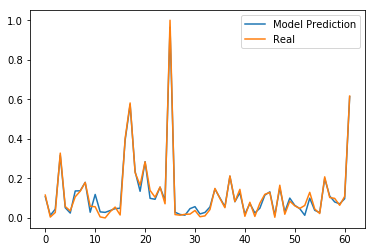

predicted =  [0.10731389]        real =  0.11547907654766998       
predicted =  [0.01290793]        real =  0.004151415759534788       
predicted =  [0.04429622]        real =  0.027681386763004866       
predicted =  [0.31718853]        real =  0.32781923911837874       
predicted =  [0.05163103]        real =  0.057692002978878484       
predicted =  [0.02463864]        real =  0.03554055552914706       
predicted =  [0.13630426]        real =  0.10674842737399186       
predicted =  [0.137264]        real =  0.13534882983948918       
predicted =  [0.17999046]        real =  0.1793189776742565       
predicted =  [0.02876432]        real =  0.05889623045110995       
predicted =  [0.11870468]        real =  0.056519465703284685       
predicted =  [0.03055659]        real =  0.005022896167070717       
predicted =  [0.02800144]        real =  0.0       
predicted =  [0.0372906]        real =  0.03140498486793111       
predicted =  [0.04708544]        real =  0.054887420576444676  

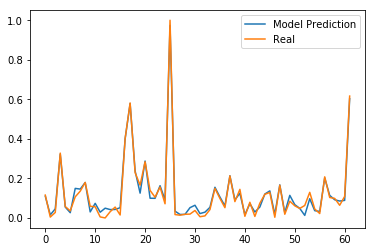

predicted =  [0.10990535]        real =  0.11547907654766998       
predicted =  [0.01539161]        real =  0.004151415759534788       
predicted =  [0.04587586]        real =  0.027681386763004866       
predicted =  [0.32244506]        real =  0.32781923911837874       
predicted =  [0.05494434]        real =  0.057692002978878484       
predicted =  [0.02652075]        real =  0.03554055552914706       
predicted =  [0.14933825]        real =  0.10674842737399186       
predicted =  [0.14582986]        real =  0.13534882983948918       
predicted =  [0.17919585]        real =  0.1793189776742565       
predicted =  [0.03038563]        real =  0.05889623045110995       
predicted =  [0.07379139]        real =  0.056519465703284685       
predicted =  [0.02890796]        real =  0.005022896167070717       
predicted =  [0.04924514]        real =  0.0       
predicted =  [0.04219224]        real =  0.03140498486793111       
predicted =  [0.04272059]        real =  0.05488742057644467

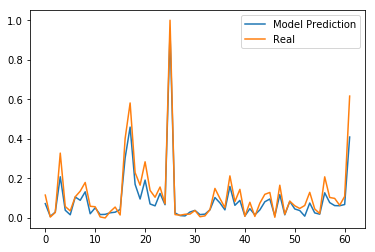

predicted =  [0.07218598]        real =  0.11547907654766998       
predicted =  [0.00789382]        real =  0.004151415759534788       
predicted =  [0.0292782]        real =  0.027681386763004866       
predicted =  [0.20823364]        real =  0.32781923911837874       
predicted =  [0.03880044]        real =  0.057692002978878484       
predicted =  [0.01581041]        real =  0.03554055552914706       
predicted =  [0.10568921]        real =  0.10674842737399186       
predicted =  [0.08919352]        real =  0.13534882983948918       
predicted =  [0.13208282]        real =  0.1793189776742565       
predicted =  [0.02109853]        real =  0.05889623045110995       
predicted =  [0.0511103]        real =  0.056519465703284685       
predicted =  [0.01697655]        real =  0.005022896167070717       
predicted =  [0.0179833]        real =  0.0       
predicted =  [0.02589463]        real =  0.03140498486793111       
predicted =  [0.02890832]        real =  0.054887420576444676  

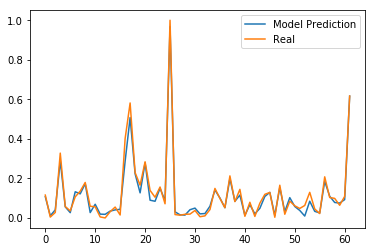

predicted =  [0.10723558]        real =  0.11547907654766998       
predicted =  [0.01077726]        real =  0.004151415759534788       
predicted =  [0.04089069]        real =  0.027681386763004866       
predicted =  [0.28974742]        real =  0.32781923911837874       
predicted =  [0.05601785]        real =  0.057692002978878484       
predicted =  [0.02671434]        real =  0.03554055552914706       
predicted =  [0.13237388]        real =  0.10674842737399186       
predicted =  [0.12169969]        real =  0.13534882983948918       
predicted =  [0.17314637]        real =  0.1793189776742565       
predicted =  [0.02697762]        real =  0.05889623045110995       
predicted =  [0.06920906]        real =  0.056519465703284685       
predicted =  [0.01914584]        real =  0.005022896167070717       
predicted =  [0.01812955]        real =  0.0       
predicted =  [0.03445533]        real =  0.03140498486793111       
predicted =  [0.04062428]        real =  0.05488742057644467

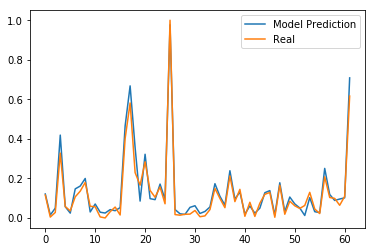

predicted =  [0.12109421]        real =  0.11547907654766998       
predicted =  [0.0146919]        real =  0.004151415759534788       
predicted =  [0.0493703]        real =  0.027681386763004866       
predicted =  [0.41893035]        real =  0.32781923911837874       
predicted =  [0.05674993]        real =  0.057692002978878484       
predicted =  [0.0243457]        real =  0.03554055552914706       
predicted =  [0.14694327]        real =  0.10674842737399186       
predicted =  [0.16121425]        real =  0.13534882983948918       
predicted =  [0.19953398]        real =  0.1793189776742565       
predicted =  [0.03016921]        real =  0.05889623045110995       
predicted =  [0.07039046]        real =  0.056519465703284685       
predicted =  [0.02890244]        real =  0.005022896167070717       
predicted =  [0.02473753]        real =  0.0       
predicted =  [0.04195927]        real =  0.03140498486793111       
predicted =  [0.03646833]        real =  0.054887420576444676  

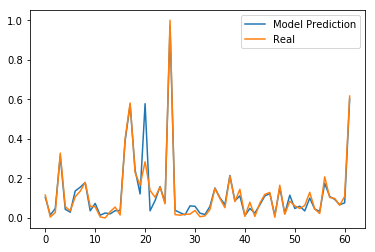

predicted =  [0.10429068]        real =  0.11547907654766998       
predicted =  [0.0145322]        real =  0.004151415759534788       
predicted =  [0.04780541]        real =  0.027681386763004866       
predicted =  [0.3138801]        real =  0.32781923911837874       
predicted =  [0.04379712]        real =  0.057692002978878484       
predicted =  [0.0289166]        real =  0.03554055552914706       
predicted =  [0.1363967]        real =  0.10674842737399186       
predicted =  [0.15546097]        real =  0.13534882983948918       
predicted =  [0.17896779]        real =  0.1793189776742565       
predicted =  [0.03605367]        real =  0.05889623045110995       
predicted =  [0.07339979]        real =  0.056519465703284685       
predicted =  [0.01363439]        real =  0.005022896167070717       
predicted =  [0.02484908]        real =  0.0       
predicted =  [0.02052361]        real =  0.03140498486793111       
predicted =  [0.0366077]        real =  0.054887420576444676    

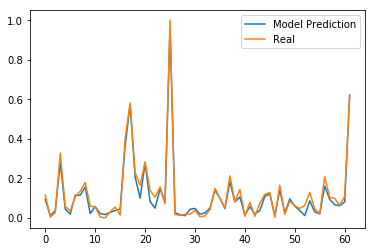

predicted =  [0.0927022]        real =  0.11547907654766998       
predicted =  [0.01123056]        real =  0.004151415759534788       
predicted =  [0.0369548]        real =  0.027681386763004866       
predicted =  [0.2816338]        real =  0.32781923911837874       
predicted =  [0.04466229]        real =  0.057692002978878484       
predicted =  [0.01917289]        real =  0.03554055552914706       
predicted =  [0.11515919]        real =  0.10674842737399186       
predicted =  [0.11476596]        real =  0.13534882983948918       
predicted =  [0.15631512]        real =  0.1793189776742565       
predicted =  [0.02176904]        real =  0.05889623045110995       
predicted =  [0.05730901]        real =  0.056519465703284685       
predicted =  [0.02186608]        real =  0.005022896167070717       
predicted =  [0.01700978]        real =  0.0       
predicted =  [0.02803068]        real =  0.03140498486793111       
predicted =  [0.03699883]        real =  0.054887420576444676  

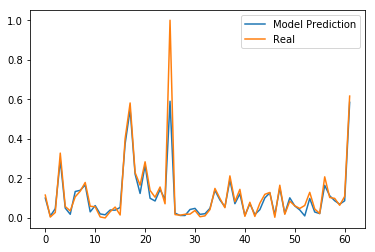

predicted =  [0.10033797]        real =  0.11547907654766998       
predicted =  [0.00951362]        real =  0.004151415759534788       
predicted =  [0.04688935]        real =  0.027681386763004866       
predicted =  [0.29273492]        real =  0.32781923911837874       
predicted =  [0.04980794]        real =  0.057692002978878484       
predicted =  [0.01838305]        real =  0.03554055552914706       
predicted =  [0.133552]        real =  0.10674842737399186       
predicted =  [0.13975699]        real =  0.13534882983948918       
predicted =  [0.16658679]        real =  0.1793189776742565       
predicted =  [0.03077115]        real =  0.05889623045110995       
predicted =  [0.06237648]        real =  0.056519465703284685       
predicted =  [0.02018872]        real =  0.005022896167070717       
predicted =  [0.01573594]        real =  0.0       
predicted =  [0.03994485]        real =  0.03140498486793111       
predicted =  [0.03913718]        real =  0.054887420576444676 

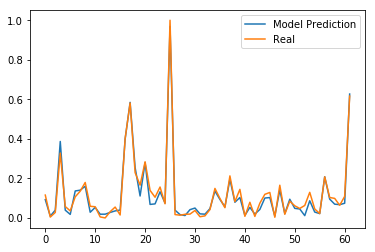

predicted =  [0.09247901]        real =  0.11547907654766998       
predicted =  [0.00908938]        real =  0.004151415759534788       
predicted =  [0.03937138]        real =  0.027681386763004866       
predicted =  [0.38679597]        real =  0.32781923911837874       
predicted =  [0.0392056]        real =  0.057692002978878484       
predicted =  [0.01777313]        real =  0.03554055552914706       
predicted =  [0.13636066]        real =  0.10674842737399186       
predicted =  [0.14043398]        real =  0.13534882983948918       
predicted =  [0.16021563]        real =  0.1793189776742565       
predicted =  [0.02859906]        real =  0.05889623045110995       
predicted =  [0.0531504]        real =  0.056519465703284685       
predicted =  [0.01869617]        real =  0.005022896167070717       
predicted =  [0.01886254]        real =  0.0       
predicted =  [0.02768881]        real =  0.03140498486793111       
predicted =  [0.03543919]        real =  0.054887420576444676 

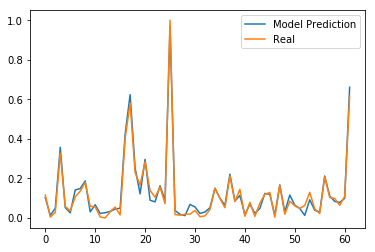

predicted =  [0.10315107]        real =  0.11547907654766998       
predicted =  [0.01279258]        real =  0.004151415759534788       
predicted =  [0.04904641]        real =  0.027681386763004866       
predicted =  [0.3571509]        real =  0.32781923911837874       
predicted =  [0.05242743]        real =  0.057692002978878484       
predicted =  [0.02582533]        real =  0.03554055552914706       
predicted =  [0.14174093]        real =  0.10674842737399186       
predicted =  [0.14861713]        real =  0.13534882983948918       
predicted =  [0.18699858]        real =  0.1793189776742565       
predicted =  [0.03067037]        real =  0.05889623045110995       
predicted =  [0.0667189]        real =  0.056519465703284685       
predicted =  [0.02240893]        real =  0.005022896167070717       
predicted =  [0.0264153]        real =  0.0       
predicted =  [0.03256512]        real =  0.03140498486793111       
predicted =  [0.04484513]        real =  0.054887420576444676  

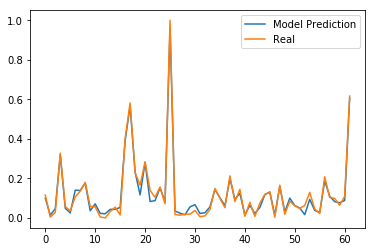

predicted =  [0.09999575]        real =  0.11547907654766998       
predicted =  [0.01415794]        real =  0.004151415759534788       
predicted =  [0.04669999]        real =  0.027681386763004866       
predicted =  [0.31814793]        real =  0.32781923911837874       
predicted =  [0.04941959]        real =  0.057692002978878484       
predicted =  [0.02506617]        real =  0.03554055552914706       
predicted =  [0.1403222]        real =  0.10674842737399186       
predicted =  [0.13882795]        real =  0.13534882983948918       
predicted =  [0.17672454]        real =  0.1793189776742565       
predicted =  [0.03632728]        real =  0.05889623045110995       
predicted =  [0.07105664]        real =  0.056519465703284685       
predicted =  [0.02272507]        real =  0.005022896167070717       
predicted =  [0.02106174]        real =  0.0       
predicted =  [0.04323702]        real =  0.03140498486793111       
predicted =  [0.04304535]        real =  0.054887420576444676

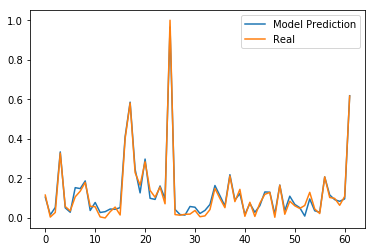

predicted =  [0.10492797]        real =  0.11547907654766998       
predicted =  [0.01542496]        real =  0.004151415759534788       
predicted =  [0.05286394]        real =  0.027681386763004866       
predicted =  [0.33394593]        real =  0.32781923911837874       
predicted =  [0.05085585]        real =  0.057692002978878484       
predicted =  [0.02868593]        real =  0.03554055552914706       
predicted =  [0.15306363]        real =  0.10674842737399186       
predicted =  [0.14830628]        real =  0.13534882983948918       
predicted =  [0.18716781]        real =  0.1793189776742565       
predicted =  [0.03760399]        real =  0.05889623045110995       
predicted =  [0.07817797]        real =  0.056519465703284685       
predicted =  [0.02733848]        real =  0.005022896167070717       
predicted =  [0.03166292]        real =  0.0       
predicted =  [0.04489062]        real =  0.03140498486793111       
predicted =  [0.0434723]        real =  0.054887420576444676

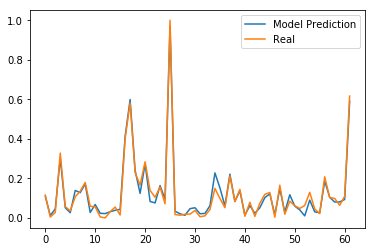

predicted =  [0.10962991]        real =  0.11547907654766998       
predicted =  [0.01187539]        real =  0.004151415759534788       
predicted =  [0.04570714]        real =  0.027681386763004866       
predicted =  [0.30236202]        real =  0.32781923911837874       
predicted =  [0.05159265]        real =  0.057692002978878484       
predicted =  [0.02629407]        real =  0.03554055552914706       
predicted =  [0.13881272]        real =  0.10674842737399186       
predicted =  [0.12801507]        real =  0.13534882983948918       
predicted =  [0.17209435]        real =  0.1793189776742565       
predicted =  [0.02742684]        real =  0.05889623045110995       
predicted =  [0.06772836]        real =  0.056519465703284685       
predicted =  [0.02343648]        real =  0.005022896167070717       
predicted =  [0.02180153]        real =  0.0       
predicted =  [0.03129491]        real =  0.03140498486793111       
predicted =  [0.03857876]        real =  0.05488742057644467

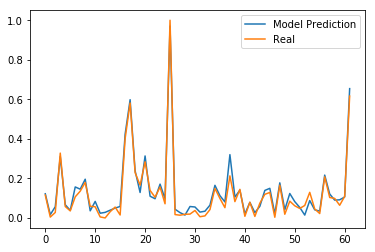

predicted =  [0.12223773]        real =  0.11547907654766998       
predicted =  [0.01647469]        real =  0.004151415759534788       
predicted =  [0.05654173]        real =  0.027681386763004866       
predicted =  [0.31017736]        real =  0.32781923911837874       
predicted =  [0.06690952]        real =  0.057692002978878484       
predicted =  [0.03785527]        real =  0.03554055552914706       
predicted =  [0.1566485]        real =  0.10674842737399186       
predicted =  [0.14538905]        real =  0.13534882983948918       
predicted =  [0.19577938]        real =  0.1793189776742565       
predicted =  [0.03588122]        real =  0.05889623045110995       
predicted =  [0.08351506]        real =  0.056519465703284685       
predicted =  [0.02366727]        real =  0.005022896167070717       
predicted =  [0.028094]        real =  0.0       
predicted =  [0.03907269]        real =  0.03140498486793111       
predicted =  [0.04973376]        real =  0.054887420576444676  

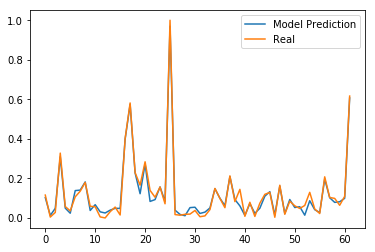

predicted =  [0.10286625]        real =  0.11547907654766998       
predicted =  [0.01259151]        real =  0.004151415759534788       
predicted =  [0.04846857]        real =  0.027681386763004866       
predicted =  [0.3090549]        real =  0.32781923911837874       
predicted =  [0.04955979]        real =  0.057692002978878484       
predicted =  [0.02377504]        real =  0.03554055552914706       
predicted =  [0.13824667]        real =  0.10674842737399186       
predicted =  [0.14068577]        real =  0.13534882983948918       
predicted =  [0.18207254]        real =  0.1793189776742565       
predicted =  [0.03769532]        real =  0.05889623045110995       
predicted =  [0.06695693]        real =  0.056519465703284685       
predicted =  [0.03076332]        real =  0.005022896167070717       
predicted =  [0.02492256]        real =  0.0       
predicted =  [0.0392283]        real =  0.03140498486793111       
predicted =  [0.04850978]        real =  0.054887420576444676 

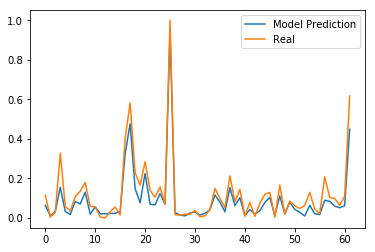

predicted =  [0.06396586]        real =  0.11547907654766998       
predicted =  [0.01025331]        real =  0.004151415759534788       
predicted =  [0.03208776]        real =  0.027681386763004866       
predicted =  [0.15510404]        real =  0.32781923911837874       
predicted =  [0.03249912]        real =  0.057692002978878484       
predicted =  [0.01718822]        real =  0.03554055552914706       
predicted =  [0.08361566]        real =  0.10674842737399186       
predicted =  [0.07020502]        real =  0.13534882983948918       
predicted =  [0.13021907]        real =  0.1793189776742565       
predicted =  [0.01920237]        real =  0.05889623045110995       
predicted =  [0.05625452]        real =  0.056519465703284685       
predicted =  [0.02082049]        real =  0.005022896167070717       
predicted =  [0.02107925]        real =  0.0       
predicted =  [0.02246803]        real =  0.03140498486793111       
predicted =  [0.02316664]        real =  0.05488742057644467

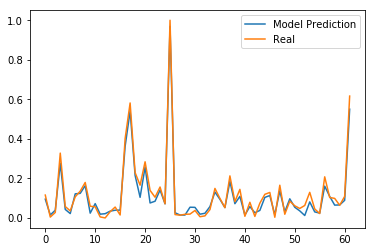

predicted =  [0.09490734]        real =  0.11547907654766998       
predicted =  [0.01497732]        real =  0.004151415759534788       
predicted =  [0.03882314]        real =  0.027681386763004866       
predicted =  [0.27657074]        real =  0.32781923911837874       
predicted =  [0.04295165]        real =  0.057692002978878484       
predicted =  [0.02197741]        real =  0.03554055552914706       
predicted =  [0.12178925]        real =  0.10674842737399186       
predicted =  [0.12417666]        real =  0.13534882983948918       
predicted =  [0.16317804]        real =  0.1793189776742565       
predicted =  [0.02410935]        real =  0.05889623045110995       
predicted =  [0.07220834]        real =  0.056519465703284685       
predicted =  [0.01892936]        real =  0.005022896167070717       
predicted =  [0.02137185]        real =  0.0       
predicted =  [0.03422216]        real =  0.03140498486793111       
predicted =  [0.03899162]        real =  0.05488742057644467

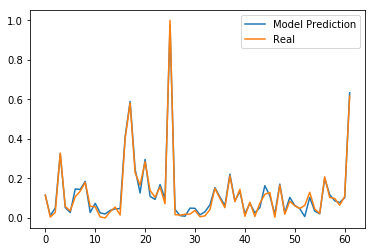

predicted =  [0.11498447]        real =  0.11547907654766998       
predicted =  [0.01152623]        real =  0.004151415759534788       
predicted =  [0.04996777]        real =  0.027681386763004866       
predicted =  [0.3243425]        real =  0.32781923911837874       
predicted =  [0.05262242]        real =  0.057692002978878484       
predicted =  [0.02714077]        real =  0.03554055552914706       
predicted =  [0.14623758]        real =  0.10674842737399186       
predicted =  [0.14394361]        real =  0.13534882983948918       
predicted =  [0.18483989]        real =  0.1793189776742565       
predicted =  [0.02730192]        real =  0.05889623045110995       
predicted =  [0.07369866]        real =  0.056519465703284685       
predicted =  [0.02526771]        real =  0.005022896167070717       
predicted =  [0.02017027]        real =  0.0       
predicted =  [0.03801641]        real =  0.03140498486793111       
predicted =  [0.04553513]        real =  0.054887420576444676

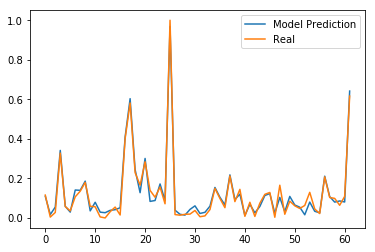

predicted =  [0.10951214]        real =  0.11547907654766998       
predicted =  [0.0171167]        real =  0.004151415759534788       
predicted =  [0.05476962]        real =  0.027681386763004866       
predicted =  [0.341495]        real =  0.32781923911837874       
predicted =  [0.05864226]        real =  0.057692002978878484       
predicted =  [0.02948788]        real =  0.03554055552914706       
predicted =  [0.14114366]        real =  0.10674842737399186       
predicted =  [0.13955706]        real =  0.13534882983948918       
predicted =  [0.18605416]        real =  0.1793189776742565       
predicted =  [0.03565222]        real =  0.05889623045110995       
predicted =  [0.07929267]        real =  0.056519465703284685       
predicted =  [0.02913469]        real =  0.005022896167070717       
predicted =  [0.02640886]        real =  0.0       
predicted =  [0.03835801]        real =  0.03140498486793111       
predicted =  [0.04160369]        real =  0.054887420576444676  

In [9]:
avg_ame = 0
print("training using 24 folds: each model has 200 epochs")
start  = time.time()
for i in range(1):
    for i in range(24):
        print(" ")
        print("Fold ","#",i+1)
        
        model = Sequential()
        model.add(Dense((128), activation="tanh", input_shape=(25,)))
        model.add(Dense((64), activation="tanh"))
        model.add(Dense((32), activation="tanh"))
        model.add(Dense((1), activation="sigmoid"))
        model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae","mape"])
        
        train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
        train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
        model.fit(train_x,train_y, epochs=200, batch_size=10, verbose=0, validation_data=(test_x,test_y))
        
        all_data_x =[]
        all_data_y = []
        for i in scaled_data:
            all_data_x.append(i[:25])
            all_data_y.append(i[25])
        all_data_x = np.array(all_data_x)
        all_data_y = np.array(all_data_y)
        
        prediction = model.predict(all_data_x)
        
        plt.plot(prediction, label="Model Prediction")
        plt.plot(all_data_y, label="Real")
        plt.legend()
        plt.show()
        
        for i in range(len(prediction)):
            print("predicted = ", prediction[i],"      ","real = ", all_data_y[i],"      ")
        print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
        prediction = model.predict(test_x)
        print("Test-MAE: ",mean_absolute_error(test_y,prediction))
        avg_ame+=mean_absolute_error(test_y,prediction)
        end = time.time()
        print("Fold Took: ",end-start)
        print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/24)